# Import necessary modules:

In [1]:
from sympy import symbols, sin, exp, Derivative
from modeci_mdf.mdf import *
from modeci_mdf.utils import simple_connect
from IPython.display import Image
from modeci_mdf.execution_engine import EvaluableGraph

# Create a model with a unique identifier and a graph for the model

In [2]:
model = Model(id="trial_model")
mod_graph = Graph(id="trial_example")

# Create 3 Nodes

In [3]:
node1 = Node(id="A")
node2 = Node(id="B")
node3 = Node(id="C")

# Add the nodes to the graph

----------
Set desired values for calculation

In [4]:
node1.parameters.append(Parameter(id="level", value=239))
node1.output_ports.append(OutputPort(id="output", value="level"))
node2.input_ports.append(InputPort(id="input"))
node3.input_ports.append(InputPort(id="input"))

In [5]:
p1 = Parameter(id="2nd-node",
               value="1*(6*(input))")

node2.parameters.append(p1)
node2.output_ports.append(OutputPort(id="output", value="2nd-node"))

In [6]:
model.graphs.append(mod_graph)
mod_graph.nodes.append(node1)
mod_graph.nodes.append(node2)

In [7]:
mod_graph.nodes.append(node3)
node3.parameters.append(Parameter(id="3rd-node", value="57*input"))
node3.output_ports.append(OutputPort(id="output", value="3rd-node"))

# Connect the nodes

----------
Node A to Node B and Node B to Node C

In [8]:
edge1 = simple_connect(node1, node2, mod_graph)
edge2 = simple_connect(node2, node3, mod_graph)

-------------
Visualize the graph using graphviz

Converting MDF graph: trial_example to graphviz (level: 3, format: png)
    Node: A
    Node: B
    Node: C
    Edge: edge_A_B connects A to B
    Edge: edge_B_C connects B to C
Written graph image to: result.png


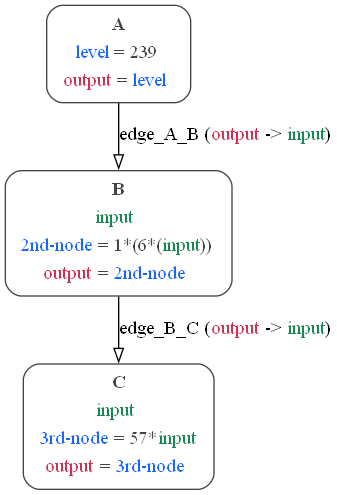

In [9]:
model.to_graph_image(
        engine="dot",
        output_format="png",
        view_on_render=False,
        level=3,
        filename_root="result"
    )

Image(filename="result.png")

## Evaluate the graph and print the output values

In [10]:
eval_grp = EvaluableGraph(mod_graph, verbose=False)
eval_grp.evaluate()

print('Output of A: %s'%eval_grp.enodes["A"].evaluable_outputs["output"].curr_value)
print('Output of B: %s'%eval_grp.enodes["B"].evaluable_outputs["output"].curr_value)
print('Output of C: %s'%eval_grp.enodes["C"].evaluable_outputs["output"].curr_value)


Init graph: trial_example
Evaluating graph: trial_example, root nodes: ['A'], with array format numpy
Output of A: 239
Output of B: 1434
Output of C: 81738
